
**Numpy**: A library written in C with a Python wrapper to give much faster computation. Allows for easy manipulation of arrays and lists with added functionality, also allows for the use of a Kalman Filter.

**Pandas**: Another library that is written in C using a Python wrapper. An extremely important library for data analysis, used for working with tabular data. Includes intuitive and additional functions that interface with **Numpy**

**Matplotlib**: A library used to visualise data.

**Seaborn**: An extension of Matplotlib that uses Matplotlib's backend. Again, used for visualising data and graphing.

**Scipy**: A library useful for process signalling and statistical analysis. Can be used to interpret data from electronic sensors.

**Sklearn**: A Machine learning library for Python that includes multiple useful loss functions such as Mean absolute error (MAE) and Mean squared error (MSE). Can be used to split data sets for testing and validating and allows for easy cross validation in machine learning algorithms. Includes the Random Forest Regression model used.

In [1]:
import numpy as np
# Data Processing
import pandas as pd
from filterpy.common import Q_discrete_white_noise
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Stats
from scipy import stats
# Algorithms
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
# Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import os

# Set random seed to be constant for reproducable results
np.random.seed(0)

sns.set()  # Stylises graphs

# Importing Data


In [3]:
df = pd.read_csv(r'C:\Users\Asus\Desktop\PG Project\Legend\vehicles\Clg project files\Phase 1\2nd review\Li-ion-SoC-Estimation comparison of all\csv-data\03-18-17_02.17 25degC_Cycle_1_Pan18650PF.csv')

In [4]:
df.head()

,Voltage,Current,Ah,Wh,Power,Battery Temp,Time,Chamber Temp
0,4.14585,-1.81290,-0.00000,-0.00000,-7.516011,21.781981,0.000000,23
1,4.10532,-1.83249,-0.00005,-0.00020,-7.522958,21.781981,0.095996,23
2,4.08666,-1.85046,-0.00010,-0.00042,-7.562201,21.781981,0.202001,23
3,4.08087,-1.85781,-0.00015,-0.00062,-7.581481,21.781981,0.297997,23
4,4.07765,-1.86353,-0.00021,-0.00084,-7.598823,21.781981,0.403005,23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109641 entries, 0 to 109640
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Voltage       109641 non-null  float64
 1   Current       109641 non-null  float64
 2   Ah            109641 non-null  float64
 3   Wh            109641 non-null  float64
 4   Power         109641 non-null  float64
 5   Battery Temp  109641 non-null  float64
 6   Time          109641 non-null  float64
 7   Chamber Temp  109641 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 6.7 MB


# Missing Values

In [6]:
df.isnull().sum() * 100 / df.shape[0]

Voltage         0.0
Current         0.0
Ah              0.0
Wh              0.0
Power           0.0
Battery Temp    0.0
Time            0.0
Chamber Temp    0.0
dtype: float64

# Duplicates

In [7]:
print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 3


The code below removes the duplicated data entries from the dataset.

In [8]:
df = df.drop_duplicates()

# Capacity
The typical capcity of this battery is **2784mAh**. This function converts the **Ah** measurement into a relative capacity by determining the capacity lost from the battery and dividing this by the known maximum capacity of the battery.

In [9]:
df['Capacity'] = 1 - (-df['Ah'] / 2.784)

In [10]:
df.head()

,Voltage,Current,Ah,Wh,Power,Battery Temp,Time,Chamber Temp,Capacity
0,4.14585,-1.81290,-0.00000,-0.00000,-7.516011,21.781981,0.000000,23,1.000000
1,4.10532,-1.83249,-0.00005,-0.00020,-7.522958,21.781981,0.095996,23,0.999982
2,4.08666,-1.85046,-0.00010,-0.00042,-7.562201,21.781981,0.202001,23,0.999964
3,4.08087,-1.85781,-0.00015,-0.00062,-7.581481,21.781981,0.297997,23,0.999946
4,4.07765,-1.86353,-0.00021,-0.00084,-7.598823,21.781981,0.403005,23,0.999925


# Visualisations


In [30]:
sns.pairplot(
    df[['Voltage', 'Current', 'Battery Temp', 'Power', 'Capacity', 'Time']],
    diag_kind='hist', palette='bright',
    plot_kws={'facecolor': 'b', 'edgecolor': 'b', 's': 1}
)

plt.savefig(r"C:\Users\Asus\Desktop\pairplot.png", dpi=600)
plt.tight_layout()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2772\2135226866.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


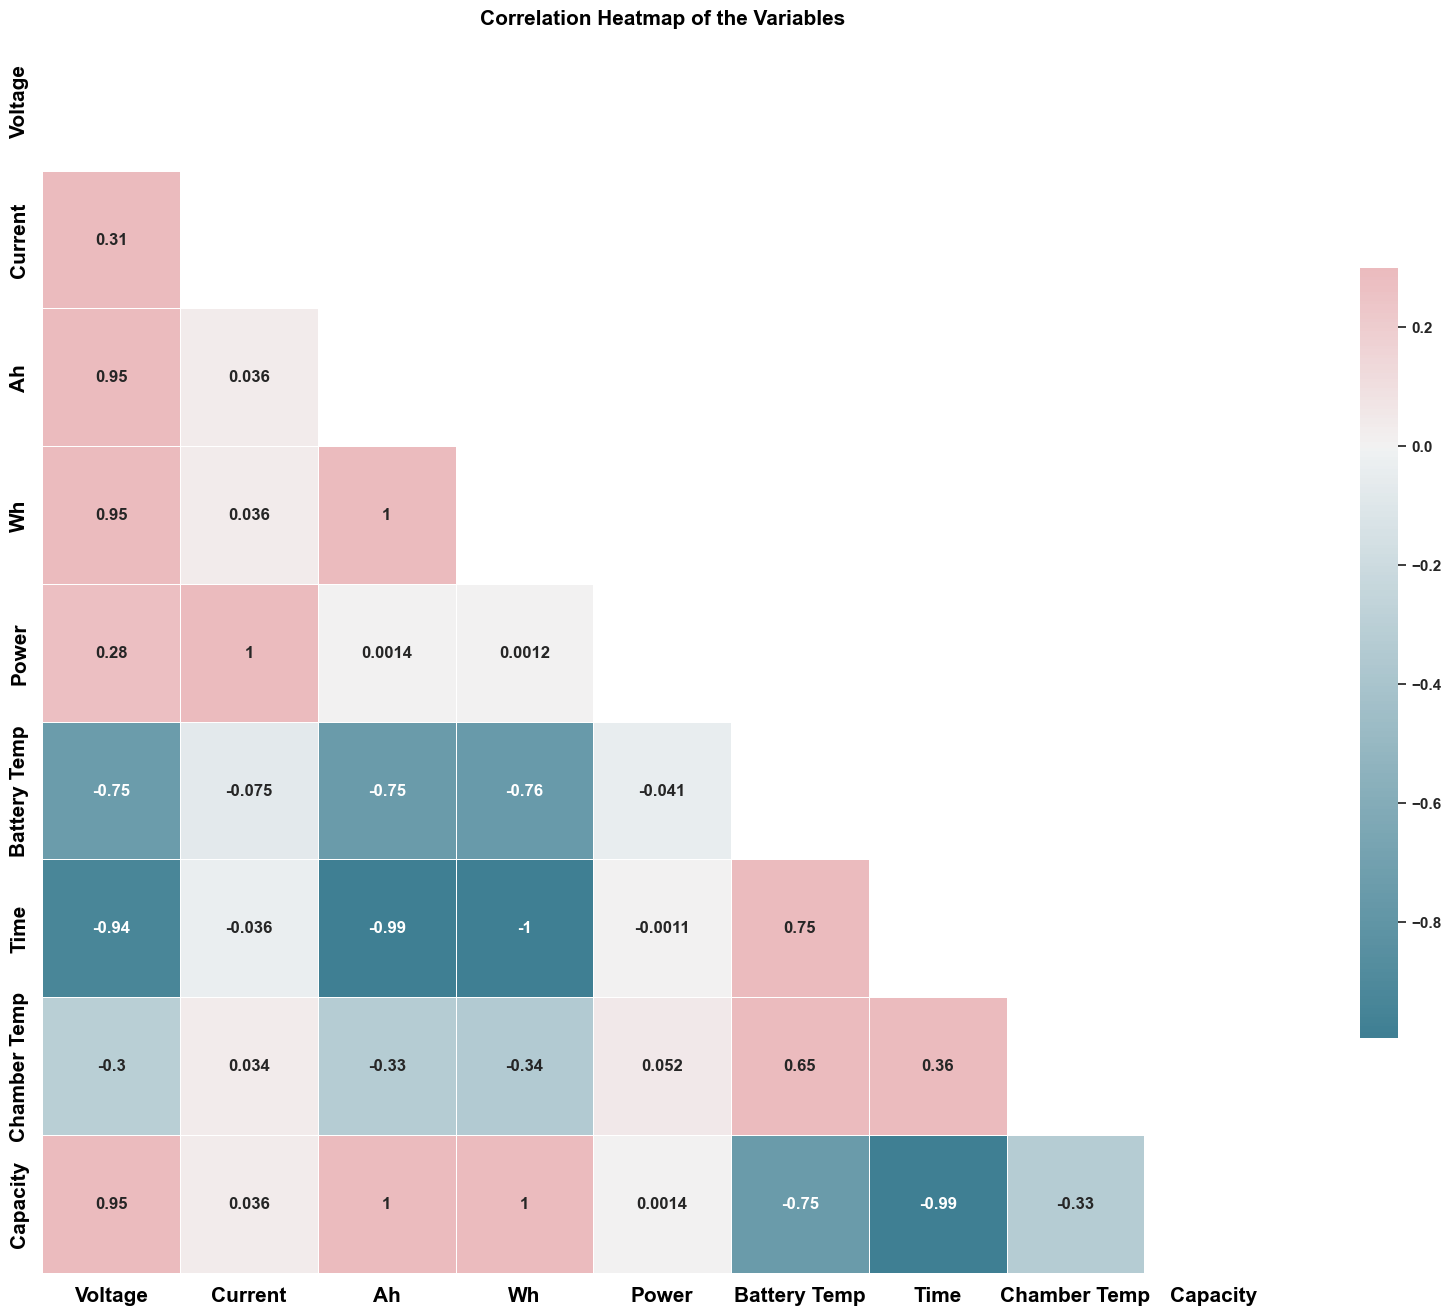

In [28]:
# Computer correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colourmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    annot=True
)

ax.set_title('Correlation Heatmap of the Variables',fontsize = 15, fontweight='bold', color='black')
plt.xticks(color='black', fontweight='bold',  fontsize = 15)
plt.yticks(color='black', fontweight='bold',  fontsize = 15)
plt.savefig(r"C:\Users\Asus\Desktop\heat map.png", dpi=600)
plt.show()

## Time Period of Data Collection
This section of the code converts the time steps in the dataset into a total run time for the data set.

In [13]:
print(f"Period of data collection: {round(max(df['Time']) / (60 ** 2), 2)} hrs")

Period of data collection: 3.05 hrs


# Machine Learning

In [14]:
X = df.copy()
y = X['Capacity']

X = X.drop(columns=['Time', 'Wh', 'Ah', 'Capacity'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.01, random_state=0)

## Support Vector Machines
This section sets up and runs a Support Vector Machine (SVM) model, more specifically a Support Vector Regression (SVR) model.

There are two parameters for this model that can be tuned to improve the accuracy of the results, the Regularisation parameter, and the 𝜀  parameter as shown below.

### Regularisation Parameter
The data for the Regularisation parameter is again graphed to show the optimal parameter number for this model. As can be seen from the graph, this model gives superior results to the previous Random forest regression model even with only one parameter tuned.

In [15]:
scores = []
reg_params = np.linspace(100, 1000, 51)

for C in reg_params:
    svm = SVR(kernel='rbf', C=C)
    svm.fit(X_train, y_train)
    
    score = mean_absolute_error(svm.predict(X_valid), y_valid)
    scores.append(score)

In [16]:
print(f'Minimum MAE: {min(scores) * 100}')
print(f'Optimal Regulator Parameter number: {round(reg_params[np.argmin(scores)], 0)}')

Minimum MAE: 5.064267639201677
Optimal Regulator Parameter number: 640.0


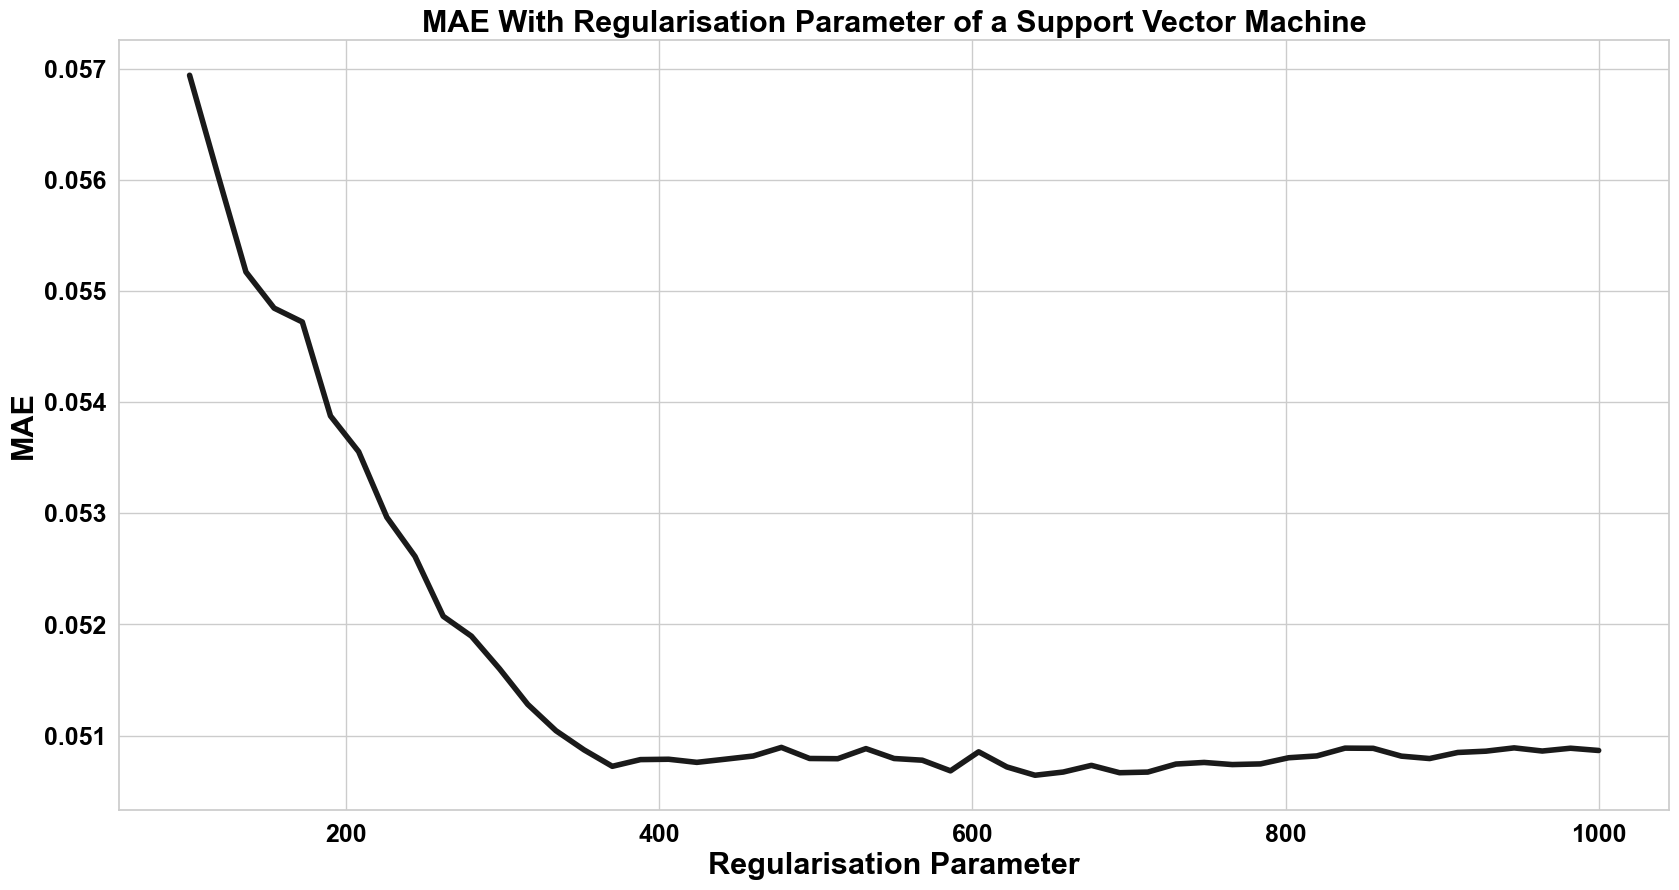

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.plot(reg_params, scores, 'k-', linewidth=4)
plt.title('MAE With Regularisation Parameter of a Support Vector Machine', fontsize = 22, fontweight='bold', color='black')
plt.xlabel('Regularisation Parameter', fontsize = 22, fontweight='bold', color='black')
plt.ylabel('MAE', fontsize = 22, fontweight='bold', color='black')
plt.xticks(color='black', fontweight='bold',  fontsize = 18)
plt.yticks(color='black', fontweight='bold',  fontsize = 18)
plt.savefig(r"C:\Users\Asus\Desktop\svmop.png", dpi=600)
plt.show()

## $\varepsilon$ Parameter
This section graphs the varying values of 𝜀 as a parameter against MAE, again to allow the best parameters to be chosen for the model. Tuning the 𝜀 parameter, before combining with the tuned Regularisation parameter, gives a minimum MAE of 0.1044.

In [157]:
scores = []
e_values = np.linspace(1e-10, 1e-1, 51)

for e in e_values:
    svm = SVR(kernel='rbf', epsilon=e)
    svm.fit(X_train, y_train)
    
    score = mean_absolute_error(svm.predict(X_valid), y_valid)
    scores.append(score)

In [160]:
print(f'Minimum MAE: {min(scores) * 1000}')
print(f'Optimal Epsilon value: {round(e_values[np.argmin(scores)], 4)}')

Minimum MAE: 10.44287628115331%
Optimal Epsilon value: 0.01


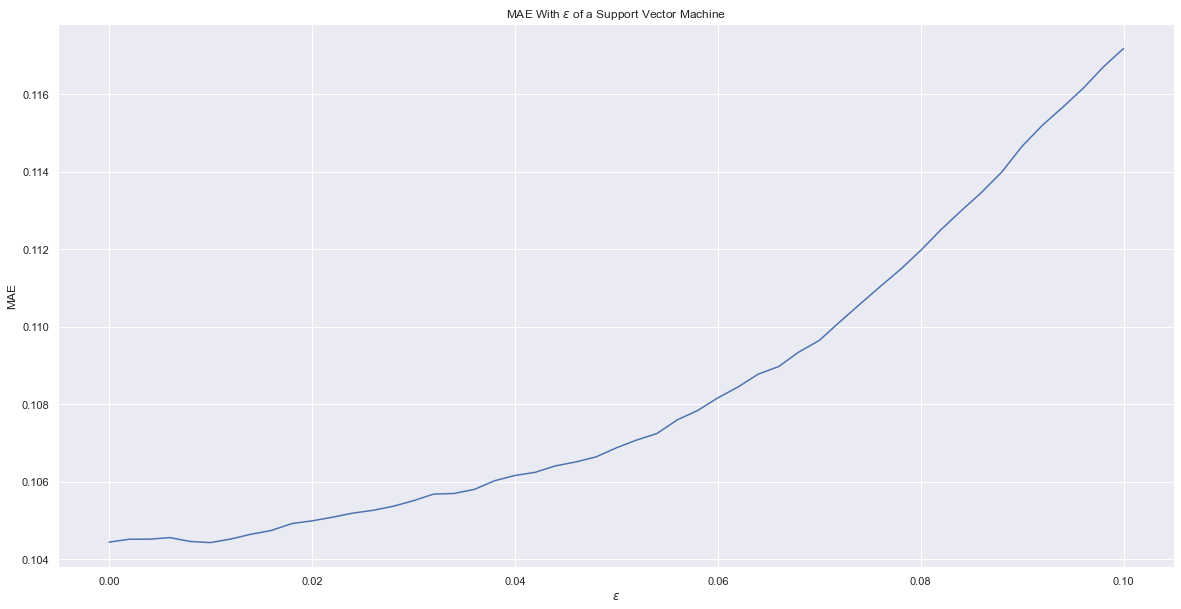

In [159]:
plt.figure(figsize=(20, 10))

plt.plot(e_values, scores)
plt.title('MAE With $\epsilon$ of a Support Vector Machine')
plt.xlabel('$\epsilon$')
plt.ylabel('MAE')

plt.show()

In [62]:
df3['Capacity'] = 1 - (-df3['Ah'] / 2.784)

In [63]:
X = df3.copy()
y = X['Capacity']

X = X.drop(columns=['Time', 'Wh', 'Ah', 'Capacity'])

In [64]:
mean_absolute_error(model.predict(X), y)

0.06964233280510271